<a href="https://colab.research.google.com/github/leqtr/Experimentation-DeepDives/blob/main/articles/01_When_Your_AB_Test_Hits_The_MDE/When_Your_AB_Test_Hits_The_MDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 0 - Preparation and parameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def group_size_proportions(p0, effect, alpha=0.05, beta=0.2, alternative='two-sided'):
    mde = effect * p0
    p1 = p0 + mde

    if alternative == 'two-sided':
        z_alpha = stats.norm.ppf(1 - alpha / 2)
    elif alternative == 'one-sided':
        z_alpha = stats.norm.ppf(1 - alpha)
    else:
        raise ValueError("Invalid alternative hypothesis: must be 'two-sided' or 'one-sided'.")
    z_beta = stats.norm.ppf(1 - beta)

    se_squared = (p0 * (1 - p0) + p1 * (1 - p1))

    n = (z_alpha + z_beta)**2 * se_squared / mde**2

    return int(np.ceil(n))

### Parameters
p0 = 0.5
effect = 0.3 ### larger effect for figures clarity
p1 = p0 * (1 + effect)
alpha = 0.05
beta = 0.2
group_size = group_size_proportions(p0, effect, alpha, beta, alternative='one-sided')

### Standard Errors
SE0 = np.sqrt((p0 * (1 - p0) + p0 * (1 - p0)) / group_size)
SE1 = np.sqrt((p0 * (1 - p0) + p1 * (1 - p1)) / group_size)

### Critical value & observed uplift (difference)
crit_val = stats.norm.ppf(1 - alpha) * SE0
obs_uplift = p1 - p0

### Distributions of test statistic (difference in proportions)
# x = np.linspace(-0.04, 0.07, 1000)
x = np.linspace(-0.25, 0.45, 1000)
null_pdf = stats.norm.pdf(x, loc = 0, scale = SE0)
alt_pdf  = stats.norm.pdf(x, loc = obs_uplift, scale = SE1)


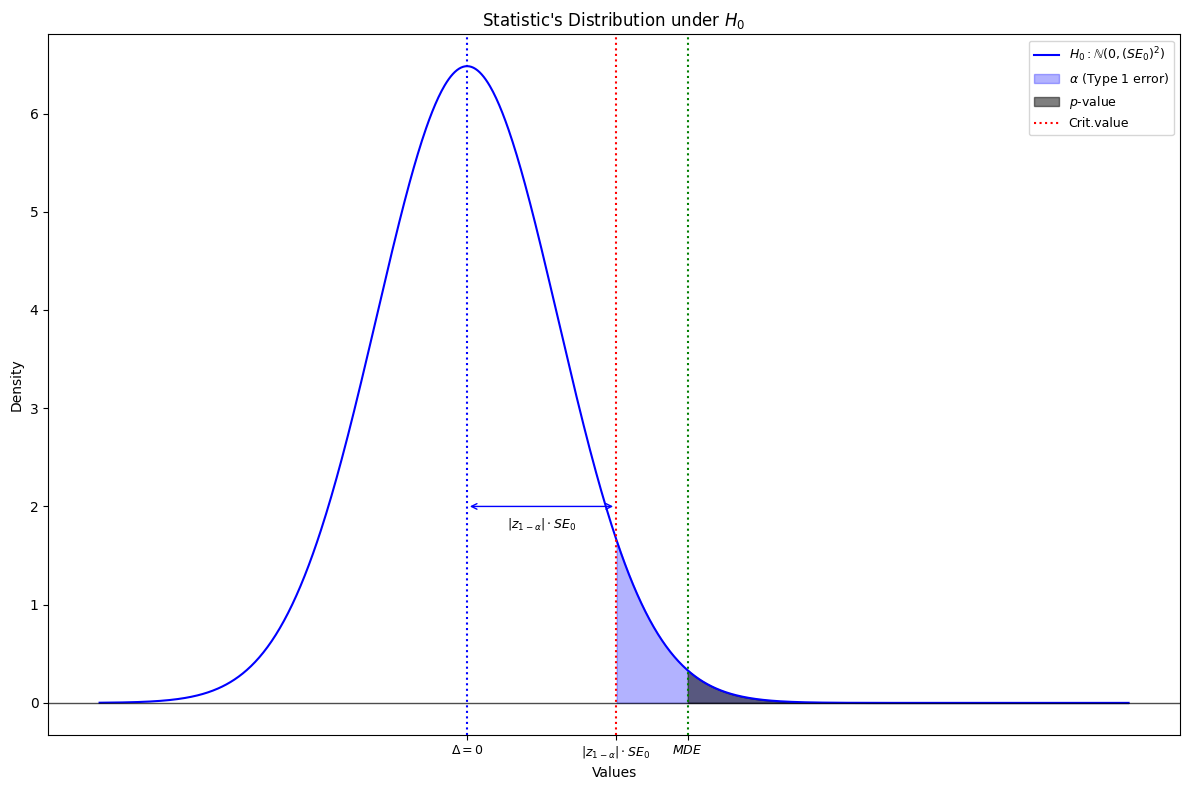

In [ ]:
### 1 - H0 distribution

fig, ax = plt.subplots(figsize=(12,8))

### Statistic Distribution (Null), alpha, p-value
ax.plot(x, null_pdf, label = r'$H_0: \mathbb{N}(0,(SE_0)^2)$', color = 'blue', zorder = 2)
ax.fill_between(x, null_pdf, where = (x >= crit_val), label = r'$\alpha$ (Type 1 error)', color = 'blue',  alpha = 0.3, zorder = 1)
ax.fill_between(x, null_pdf, where = (x >= obs_uplift), label = r'$p$-value', color = 'black',  alpha = 0.5, zorder = 1)

### Marking Values
ax.axhline(0, linestyle='-', color = 'black', linewidth = 1, alpha = 0.7, zorder = 3)
ax.axvline(0, linestyle=':', color = 'blue', linewidth = 1.5, zorder = 3)
ax.axvline(crit_val, linestyle=':', color = 'red', linewidth = 1.5, zorder = 3, label = 'Crit.value')
ax.axvline(obs_uplift, linestyle=':', color = 'green', linewidth = 1.5, zorder = 3)

### Labeling Values
ax.set_xticks([0, crit_val, obs_uplift])
ax.set_xticklabels([
     r'$\Delta = 0$'
    ,r'$|z_{1-\alpha}| \cdot SE_0 $'
    ,r'$MDE$'
], fontsize=9)
# ax.set_yticks([])

## Distances
y_arrow = 2.0
ax.annotate('', xy = (0, y_arrow), xytext = (crit_val, y_arrow),
            arrowprops = dict(arrowstyle='<->', color = 'blue'))
ax.text((0 + crit_val)/2, y_arrow - 0.1, r'$|z_{1-\alpha}| \cdot SE_0 $', ha='center', va='top', fontsize=9)

### Plot
ax.set_title(r"Statistic's Distribution under $H_0$")
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


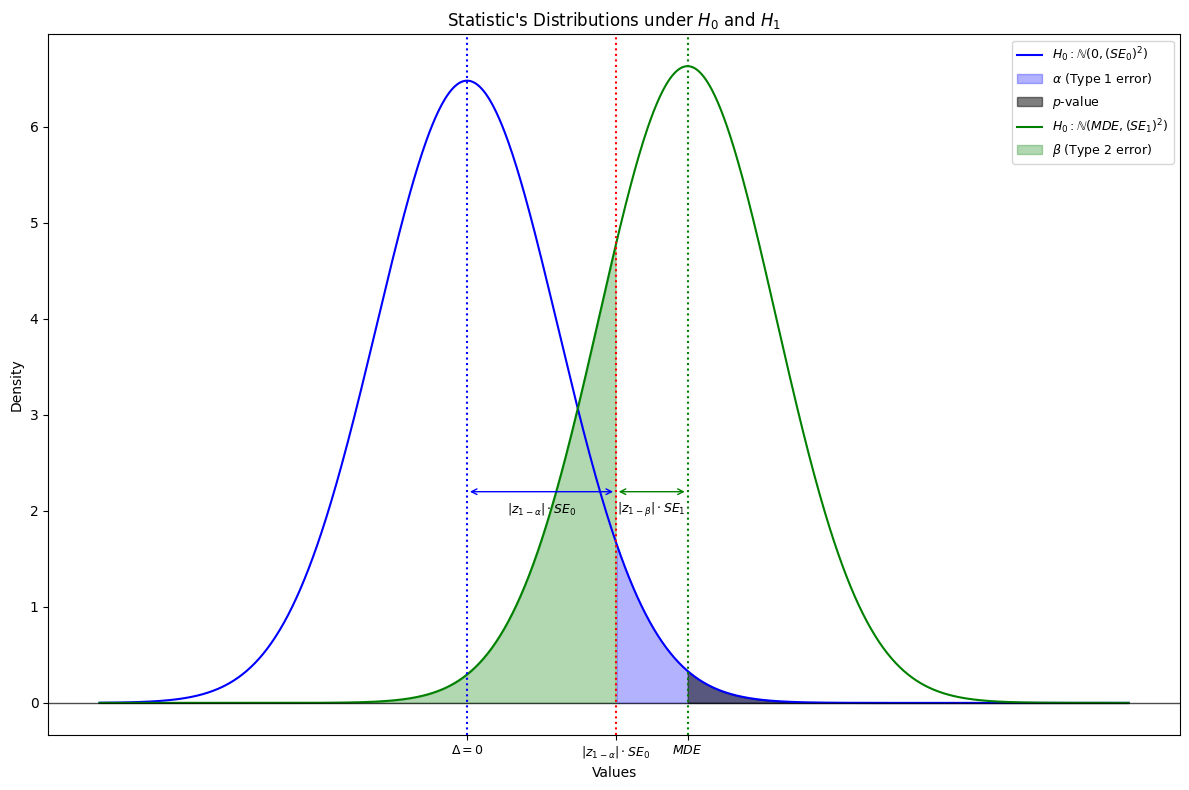

In [ ]:
### 2 - H0, H1 distributions

fig, ax = plt.subplots(figsize=(12,8))

### Statistic Distribution (Null), alpha, p-value
ax.plot(x, null_pdf, label = r'$H_0: \mathbb{N}(0,(SE_0)^2)$', color = 'blue', zorder = 2)
ax.fill_between(x, null_pdf, where = (x >= crit_val), label = r'$\alpha$ (Type 1 error)', color = 'blue',  alpha = 0.3, zorder = 1)
ax.fill_between(x, null_pdf, where = (x >= obs_uplift), label = r'$p$-value', color = 'black',  alpha = 0.5, zorder = 1)
ax.plot(x, alt_pdf,  label = r'$H_0: \mathbb{N}(MDE,(SE_1)^2)$', color = 'green', zorder=2)
ax.fill_between(x, alt_pdf,  where = (x <= crit_val), label = r'$\beta$ (Type 2 error)', color = 'green', alpha = 0.3, zorder = 1)

### Marking Values
ax.axhline(0, linestyle='-', color = 'black', linewidth = 1, alpha = 0.7, zorder = 3)
ax.axvline(0, linestyle=':', color = 'blue', linewidth = 1.5, zorder = 3)
ax.axvline(crit_val, linestyle=':', color = 'red', linewidth = 1.5, zorder = 3)
ax.axvline(obs_uplift, linestyle=':', color = 'green', linewidth = 1.5, zorder = 3)

### Labeling Values
ax.set_xticks([0, crit_val, obs_uplift])
ax.set_xticklabels([
     r'$\Delta = 0$'
    ,r'$|z_{1-\alpha}| \cdot SE_0 $'
    ,r'$MDE$'
], fontsize=9)
# ax.set_yticks([])

## Distances
y_arrow = 2.2
ax.annotate('', xy = (0, y_arrow), xytext = (crit_val, y_arrow),
            arrowprops = dict(arrowstyle='<->', color = 'blue'))
ax.text((0 + crit_val)/2, y_arrow - 0.1, r'$|z_{1-\alpha}| \cdot SE_0 $', ha='center', va='top', fontsize=9)
ax.annotate('', xy=(crit_val, y_arrow), xytext=(obs_uplift, y_arrow),
            arrowprops=dict(arrowstyle='<->', color='green'))
ax.text((crit_val + obs_uplift)/2, y_arrow - 0.1, r'$|z_{1-\beta}| \cdot SE_1 $', ha='center', va='top', fontsize=9)

### Plot
ax.set_title(r"Statistic's Distributions under $H_0$ and $H_1$")
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


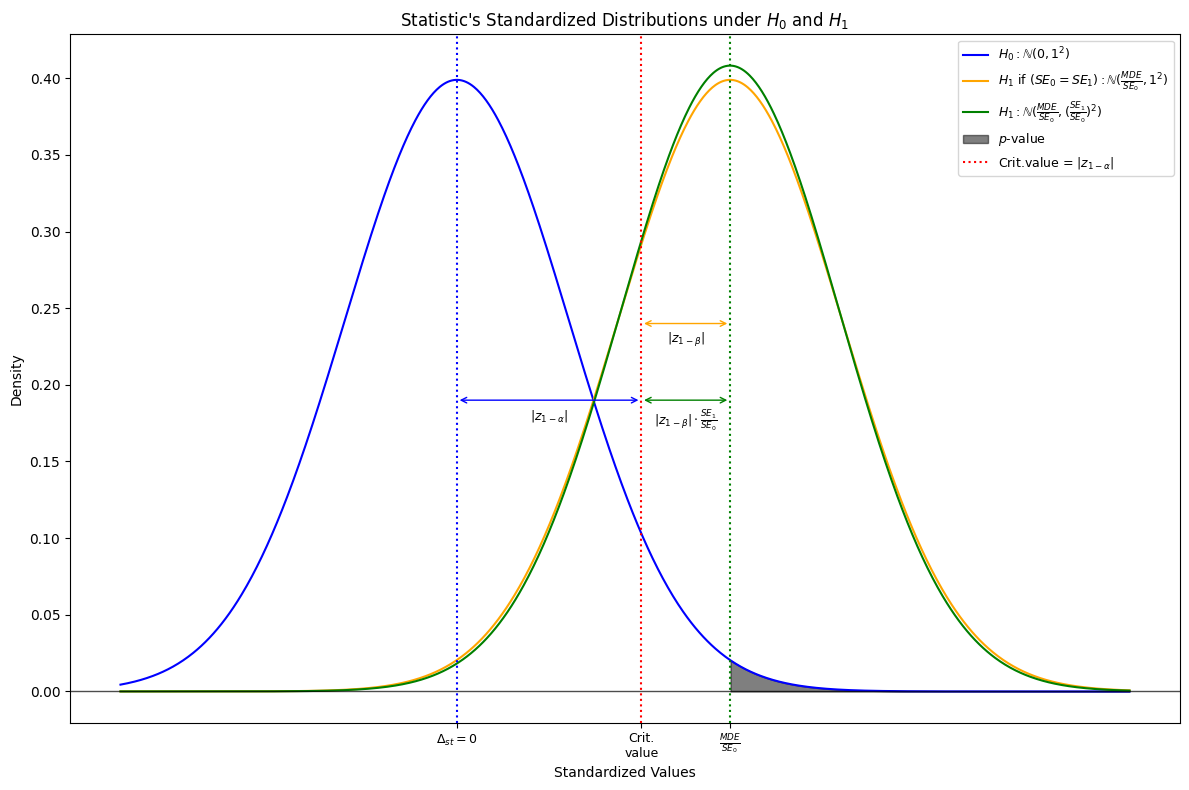

In [ ]:
### 3 - Standardized H0, H1 distributions

### Critical value & observed uplift (difference)
st_crit_val = stats.norm.ppf(1 - alpha)
st_obs_uplift = (p1 - p0)/SE0

### Distributions of standradized test statistic (difference in proportions)
x = np.linspace(-3, 6, 1000)
st_null_pdf = stats.norm.pdf(x, loc = 0, scale = 1)
st_alt_pdf_w_same_SE = stats.norm.pdf(x, loc = st_obs_uplift, scale = 1)
st_alt_pdf  = stats.norm.pdf(x, loc = st_obs_uplift, scale = SE1/SE0)

fig, ax = plt.subplots(figsize=(12,8))

### Statistic Distribution (Null), alpha, p-value
ax.plot(x, st_null_pdf, label = r'$H_0: \mathbb{N}(0,1^2)$', color = 'blue', zorder = 2)
ax.plot(x, st_alt_pdf_w_same_SE,  label = r'$H_1$ if $(SE_0 = SE_1): \mathbb{N}(\frac{MDE}{SE_0},1^2)$', color = 'orange', zorder=2)
ax.plot(x, st_alt_pdf,  label = r'$H_1:\mathbb{N}(\frac{MDE}{SE_0},(\frac{SE_1}{SE_0})^2)$', color = 'green', zorder=2)
ax.fill_between(x, st_null_pdf, where = (x >= st_obs_uplift), label = r'$p$-value', color = 'black',  alpha = 0.5, zorder = 1)

### Marking Values
ax.axhline(0, linestyle='-', color = 'black', linewidth = 1, alpha = 0.7, zorder = 3)
ax.axvline(0, linestyle=':', color = 'blue', linewidth = 1.5, zorder = 3)
ax.axvline(st_crit_val, linestyle=':', color = 'red', linewidth = 1.5, zorder = 3, label = r'Crit.value = $|z_{1-\alpha}|$')
ax.axvline(st_obs_uplift, linestyle=':', color = 'green', linewidth = 1.5, zorder = 3)

### Labeling Values
ax.set_xticks([0, st_crit_val, st_obs_uplift])
ax.set_xticklabels([
     r'$\Delta_{st} = 0$'
    ,'Crit.\nvalue'
    ,r'$\frac{MDE}{SE_0}$'
], fontsize=9)
# ax.set_yticks([])

## Distances
y_arrow = 0.19
ax.annotate('', xy = (0, y_arrow), xytext = (st_crit_val, y_arrow),
            arrowprops = dict(arrowstyle='<->', color = 'blue'))
ax.text((0 + st_crit_val)/2, y_arrow - 0.005, r'$|z_{1-\alpha}|$', ha='center', va='top', fontsize=9)
ax.annotate('', xy=(st_crit_val, y_arrow), xytext=(st_obs_uplift, y_arrow),
            arrowprops=dict(arrowstyle='<->', color='green'))
ax.text((st_crit_val + st_obs_uplift)/2, y_arrow - 0.005, r'$|z_{1-\beta}| \cdot \frac{SE_1}{SE_0} $', ha='center', va='top', fontsize=9)
ax.annotate('', xy=(st_crit_val, y_arrow + 0.05), xytext=(st_obs_uplift, y_arrow + 0.05),
            arrowprops=dict(arrowstyle='<->', color='orange'))
ax.text((st_crit_val + st_obs_uplift)/2, y_arrow + 0.05 - 0.005, r'$|z_{1-\beta}|$', ha='center', va='top', fontsize=9)

### Plot
ax.set_title(r"Statistic's Standardized Distributions under $H_0$ and $H_1$")
ax.set_xlabel('Standardized Values')
ax.set_ylabel('Density')
ax.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()


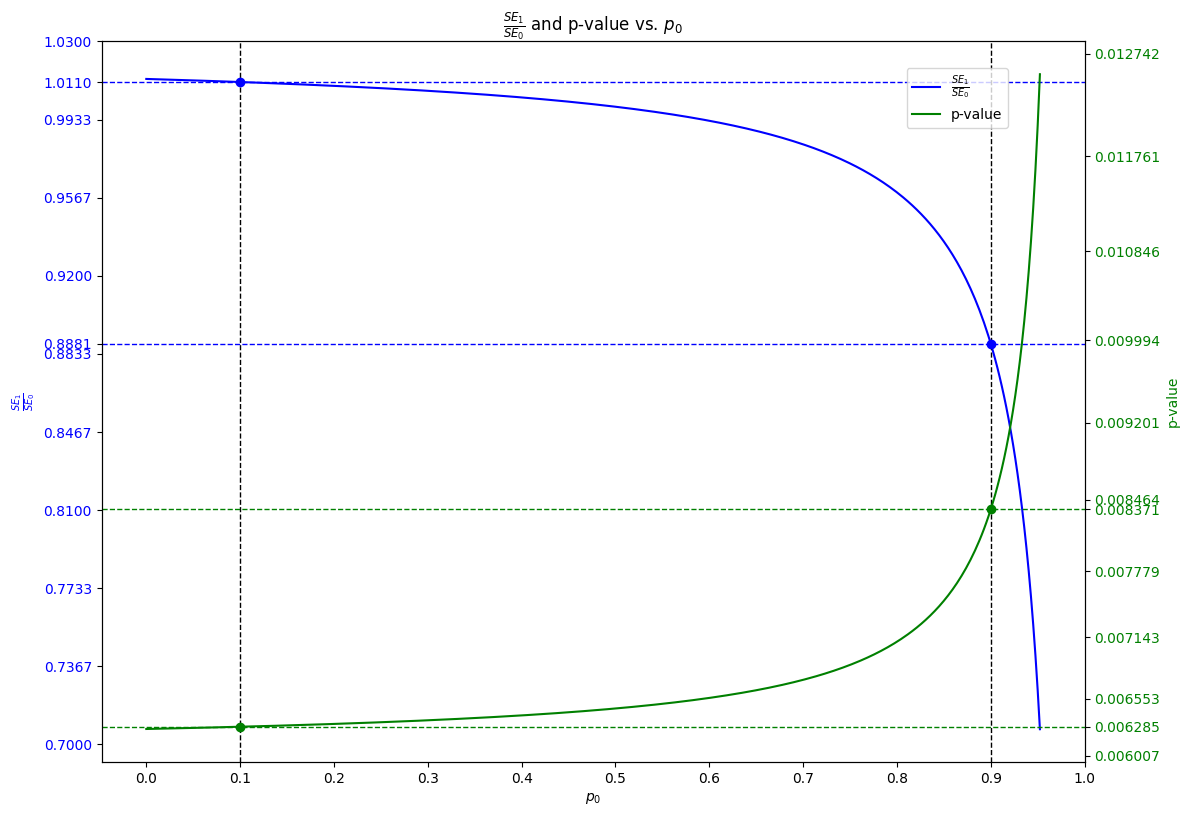

In [ ]:
### 4 - p_0, SE ratio and pvalues

p_s = np.linspace(0, 1/1.05, 400)
ratios = np.sqrt((1.05*(1 - 1.05*p_s)/(1 - p_s) + 1) / 2)

z_alpha = stats.norm.ppf(1 - alpha)
z_beta = stats.norm.ppf(1 - beta)
mdes_st = [abs(z_alpha) + abs(z_beta) * r for r in ratios]
pvals = 1 - stats.norm.cdf(mdes_st)

fig, ax1 = plt.subplots(figsize=(12,8))

### ratio
ax1.plot(p_s, ratios, color='blue', label=r"$\frac{SE_1}{SE_0}$")
ax1.set_xlabel(r"$p_0$")
ax1.set_ylabel(r"$\frac{SE_1}{SE_0}$", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(np.arange(0,1.01,0.1))

### p-value
ax2 = ax1.twinx()
ax2.plot(p_s, pvals, color='green', label="p-value")
ax2.set_ylabel("p-value", color='green')
ax2.tick_params(axis='y', labelcolor='green')

p_points = [0.1, 0.9]
ratio_points = [np.sqrt((1.05*(1 - 1.05*pv)/(1 - pv) + 1) / 2) for pv in p_points]
pval_points = [1 - stats.norm.cdf(abs(z_alpha) + abs(z_beta) * R) for R in ratio_points]
for pv, rv, pval in zip(p_points, ratio_points, pval_points):
    ax1.axvline(pv, color='black', linestyle='--', linewidth=1)
    ax1.axhline(rv, color='blue', linestyle='--', linewidth=1)
    ax2.axhline(pval, color='green', linestyle='--', linewidth=1)
    ax1.scatter([pv], [rv], color='blue', zorder=5)
    ax2.scatter([pv], [pval], color='green', zorder=5)

# ax1_yticks = np.arange(0.7,1.06,0.05)
# ax2_yticks = np.arange(0.005,0.015,0.002)
ax1_yticks = np.linspace(0.7,1.03,10)
ax2_yticks = np.array([1 - stats.norm.cdf(abs(z_alpha) + abs(z_beta) * r) for r in ax1_yticks])
ax1.set_yticks(np.concatenate([ax1_yticks, ratio_points]))
ax2.set_yticks(np.concatenate([ax2_yticks, pval_points]))

### Plot
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.85,0.95))
plt.title(r"$\frac{SE_1}{SE_0}$ and p-value vs. $p_0$")
plt.show()
